In [4]:
import numpy as np
import pandas as pd 
from pandas import Series, DataFrame
from numpy.random import randn

from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
dataset = randn(25)

(0, 1)

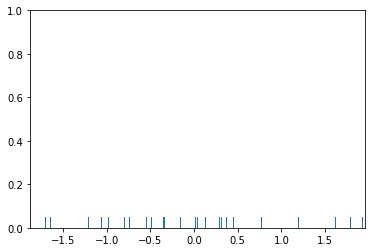

In [7]:
sns.rugplot(dataset)
plt.ylim(0,1)

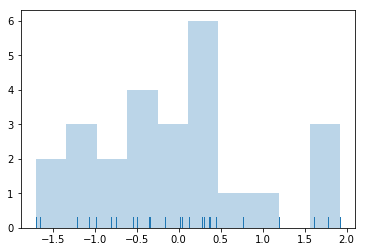

In [11]:
plt.hist(dataset,alpha=0.3)
sns.rugplot(dataset)


(0, 1)

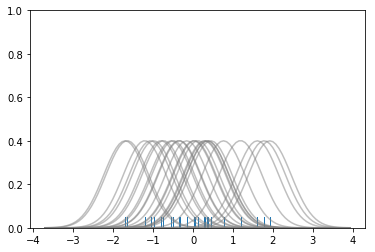

In [12]:
sns.rugplot(dataset)
x_min = dataset.min()-2
x_max = dataset.max()+2
x_axis = np.linspace(x_min,x_max,100)

bandwith = ((4*dataset.std()**5) / (3*len(dataset))) ** 0.2

kernel_list = []

for data_point in dataset:
    #create kernal for each point and append it to the kernel_list
    kernel = stats.norm(data_point,bandwith).pdf(x_axis)
    kernel_list.append(kernel)
    
    #scale for ploting
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    
    plt.plot(x_axis,kernel,color='grey',alpha=0.5)
    
plt.ylim(0,1)    

Text(0.5,0.98,u'Sum of the basis functions')

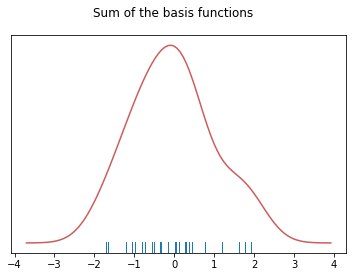

In [14]:
sum_of_kde=np.sum(kernel_list,axis=0)
fig = plt.plot(x_axis,sum_of_kde,color='indianred')
sns.rugplot(dataset)
plt.yticks([])
plt.suptitle("Sum of the basis functions")


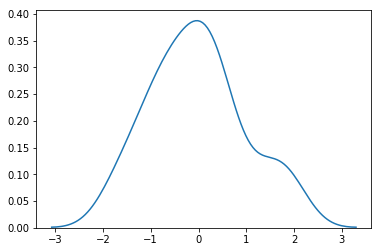

In [15]:
sns.kdeplot(dataset)

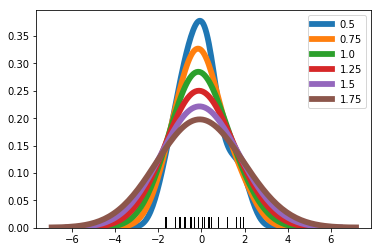

In [18]:
sns.rugplot(dataset, color='black')
for bw in np.arange(0.5,2,0.25):
    sns.kdeplot(dataset,bw=bw,lw=5.8,label=bw)
    

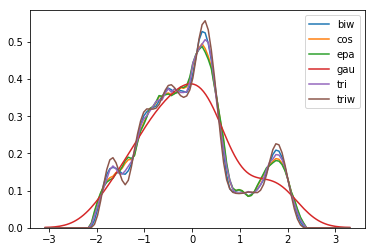

In [20]:
# We can also choose different kernels

kernel_options = ["biw", "cos", "epa", "gau", "tri", "triw"]

# More info on types
url = 'http://en.wikipedia.org/wiki/Kernel_(statistics)'

# Use label to set legend
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern)

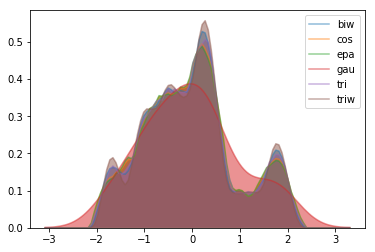

In [21]:
# We can also shade if desired
for kern in kernel_options:
    sns.kdeplot(dataset,kernel=kern,label=kern,shade=True,alpha=0.5)

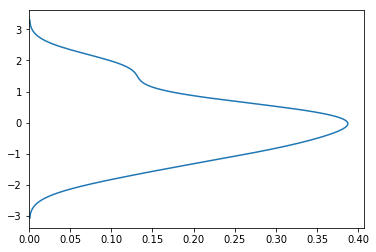

In [22]:
# For vertical axis, use the vertical keyword
sns.kdeplot(dataset,vertical=True)


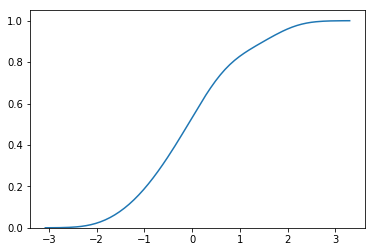

In [23]:
sns.kdeplot(dataset,cumulative=True)

C:\Anaconda2\envs\mypython27\lib\site-packages\seaborn\distributions.py:645: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


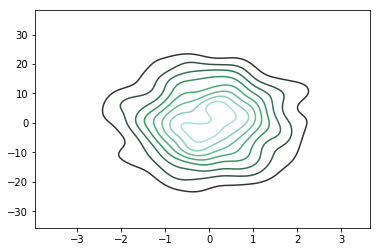

In [26]:
mean = [0,0]
cov = [[1,0],[0,100]]
dataset2 = np.random.multivariate_normal(mean,cov,1000)
dframe = pd.DataFrame(dataset2,columns=['X','Y'])
sns.kdeplot(dframe)

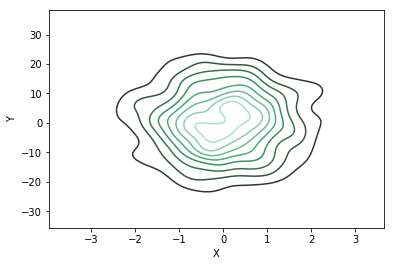

In [27]:
sns.kdeplot(dframe.X,dframe.Y)

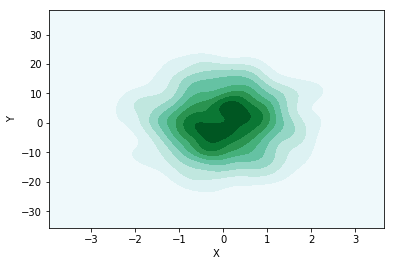

In [28]:
sns.kdeplot(dframe.X,dframe.Y,shade=True)

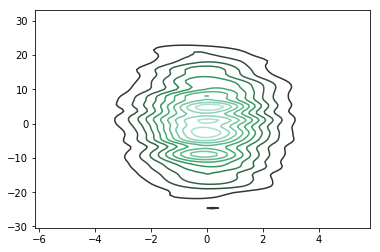

In [29]:
sns.kdeplot(dframe,bw=1)

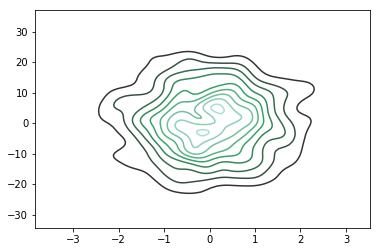

In [30]:
sns.kdeplot(dframe,bw='silverman')

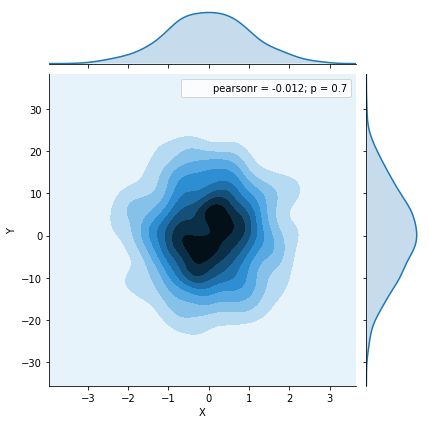

In [31]:
sns.jointplot('X','Y',dframe,kind="kde")